In [7]:
import requests
import pandas as pd
import geopandas as gpd
import numpy as np
import shapely.wkb 
from shapely.ops import cascaded_union, unary_union
from shapely.geometry import Polygon, Point, MultiPolygon
from tqdm import tqdm
import matplotlib.pyplot as plt

%matplotlib inline

# Protected areas percentage

### Read Global Facets table

In [5]:
path = '../data/'

In [6]:
df = gpd.read_file(path+'global_facets_attr_pressures_all/global_facets_attr_pressures.shp')
df.columns = map(str.lower, df.columns)

DriverError: ../data/global_facets_attr_pressures_all/global_facets_attr_pressures.shp: No such file or directory

### Read Terrestrial and Marine grids

We read the grids from the carto account

In [2]:
account = 'half-earth'
urlCarto = f"https://{account}.carto.com/api/v2/sql"

**Terrestrial grid**

In [3]:
query =("SELECT cartodb_id, cell_id, the_geom FROM terrestrial_grid")

sql = {"q": query}
r = requests.get(urlCarto, params=sql)

data = r.json()

terrestrial = gpd.GeoDataFrame(data.get("rows"))
# Change geometry from WKB to WKT format
terrestrial['geometry'] = terrestrial.apply(lambda x: shapely.wkb.loads(x['the_geom'],hex=True), axis=1 )
terrestrial.drop(columns='the_geom', inplace=True)
terrestrial.sort_values(by=['cartodb_id'], inplace=True)
terrestrial.head()

/home/iker/anaconda3/lib/python3.8/site-packages/pandas/core/dtypes/inference.py:384: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  iter(obj)  # Can iterate over it.
/home/iker/anaconda3/lib/python3.8/site-packages/pandas/core/dtypes/inference.py:385: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  len(obj)  # Has a length associated with it.
/home/iker/anaconda3/lib/python3.8/site-packages/pandas/core/dtypes/cast.py:1638: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  result[:] = values


,cartodb_id,cell_id,geometry
120,1,21572,"MULTIPOLYGON (((152.00000 -3.29760, 151.50000 ..."
121,2,23696,"MULTIPOLYGON (((116.00000 -9.33705, 115.50000 ..."
122,3,20468,"MULTIPOLYGON (((127.00000 -0.29578, 127.00000 ..."
123,4,18301,"MULTIPOLYGON (((121.00000 5.71369, 120.50000 5..."
124,5,23351,"MULTIPOLYGON (((131.00000 -8.32504, 130.50000 ..."


**Marine grid**

In [4]:
query =("SELECT cartodb_id, cell_id, the_geom FROM marine_grid")

sql = {"q": query}
r = requests.get(urlCarto, params=sql)

data = r.json()

marine = gpd.GeoDataFrame(data.get("rows"))
# Change geometry from WKB to WKT format
marine['geometry'] = marine.apply(lambda x: shapely.wkb.loads(x['the_geom'],hex=True), axis=1 )
marine.drop(columns='the_geom', inplace=True)
marine.sort_values(by=['cartodb_id'], inplace=True)

/home/iker/anaconda3/lib/python3.8/site-packages/pandas/core/dtypes/inference.py:384: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  iter(obj)  # Can iterate over it.
/home/iker/anaconda3/lib/python3.8/site-packages/pandas/core/dtypes/inference.py:385: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  len(obj)  # Has a length associated with it.
/home/iker/anaconda3/lib/python3.8/site-packages/pandas/core/dtypes/cast.py:1638: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  result[:] = values


### Read Protected Areas

In [5]:
all_wdpa = gpd.read_file(path+'wdpa_protected_areas/wdpa_protected_areas.shp')

NameError: name 'path' is not defined

In [8]:
query =("SELECT cartodb_id, iucn_cat, desig_eng, the_geom FROM wdpa_protected_areas")

sql = {"q": query}
r = requests.get(urlCarto, params=sql)

data = r.json()

all_wdpa = gpd.GeoDataFrame(data.get("rows"))
# Change geometry from WKB to WKT format
all_wdpa['geometry'] = all_wdpa.apply(lambda x: shapely.wkb.loads(x['the_geom'],hex=True), axis=1 )
all_wdpa.drop(columns='the_geom', inplace=True)
all_wdpa.sort_values(by=['cartodb_id'], inplace=True)

/home/iker/anaconda3/lib/python3.8/site-packages/pandas/core/dtypes/inference.py:384: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  iter(obj)  # Can iterate over it.
/home/iker/anaconda3/lib/python3.8/site-packages/pandas/core/dtypes/inference.py:385: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  len(obj)  # Has a length associated with it.
/home/iker/anaconda3/lib/python3.8/site-packages/pandas/core/dtypes/cast.py:1638: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  result[:] = values


In [9]:
all_wdpa.head()

,cartodb_id,iucn_cat,desig_eng,geometry
0,844530,Not Reported,"Ramsar Site, Wetland of International Importance","MULTIPOLYGON (((5.90003 8.95104, 5.91665 8.900..."
6077,844531,Not Reported,"Ramsar Site, Wetland of International Importance","MULTIPOLYGON (((17.49386 45.12667, 17.49335 45..."
6080,844532,Not Reported,"Ramsar Site, Wetland of International Importance","MULTIPOLYGON (((35.67713 36.73851, 35.67887 36..."
2,844533,Not Reported,"Ramsar Site, Wetland of International Importance","MULTIPOLYGON (((27.06407 65.25402, 27.06510 65..."
6083,844534,Not Reported,"Ramsar Site, Wetland of International Importance","MULTIPOLYGON (((25.45955 61.07026, 25.46062 61..."


**Strict**

In [10]:
strict = all_wdpa[(all_wdpa['iucn_cat'] == 'Ia') | 
                         (all_wdpa['iucn_cat'] == 'Ib') |
                         (all_wdpa['iucn_cat'] == 'II') |
                         (all_wdpa['iucn_cat'] == 'III')
                        ][['cartodb_id', 'geometry']]

**Biosphere**

In [11]:
biosphere = all_wdpa[all_wdpa['desig_eng'].str.contains('Biosphere', regex=False)][['cartodb_id', 'geometry']]

**Other**

In [12]:
other = all_wdpa[(all_wdpa['iucn_cat'] != 'Ia') & 
                         (all_wdpa['iucn_cat'] != 'Ib') &
                         (all_wdpa['iucn_cat'] != 'II') &
                         (all_wdpa['iucn_cat'] != 'III') &
                         (~all_wdpa['desig_eng'].str.contains('Aborig', regex=False)) &
                         (~all_wdpa['desig_eng'].str.contains('Indigen', regex=False)) &
                         (~all_wdpa['desig_eng'].str.contains('Commun', regex=False)) &
                         (~all_wdpa['desig_eng'].str.contains('Conservanc', regex=False)) &
                         (~all_wdpa['desig_eng'].str.contains('Local', regex=False)) &
                         (~all_wdpa['desig_eng'].str.contains('Region', regex=False)) &
                         (~all_wdpa['desig_eng'].str.contains('Trust', regex=False)) &
                         (~all_wdpa['desig_eng'].str.contains('Conservator', regex=False)) &
                         (~all_wdpa['desig_eng'].str.contains('Private', regex=False)) &
                         (~all_wdpa['desig_eng'].str.contains('Nature Center', regex=False)) 
                        ][['cartodb_id', 'geometry']]

**Conservation**

In [ ]:
conservation = gpd.read_file(path+'community_conservation_areas/community_conservation_areas.shp')

In [13]:
query =("SELECT cartodb_id, name, source, the_geom FROM community_conservation_areas")

sql = {"q": query}
r = requests.get(urlCarto, params=sql)

data = r.json()

conservation = gpd.GeoDataFrame(data.get("rows"))
# Change geometry from WKB to WKT format
conservation['geometry'] = conservation.apply(lambda x: shapely.wkb.loads(x['the_geom'],hex=True), axis=1 )
conservation.drop(columns='the_geom', inplace=True)
conservation.sort_values(by=['cartodb_id'], inplace=True)
conservation.head()

/home/iker/anaconda3/lib/python3.8/site-packages/pandas/core/dtypes/inference.py:384: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  iter(obj)  # Can iterate over it.
/home/iker/anaconda3/lib/python3.8/site-packages/pandas/core/dtypes/inference.py:385: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  len(obj)  # Has a length associated with it.
/home/iker/anaconda3/lib/python3.8/site-packages/pandas/core/dtypes/cast.py:1638: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  result[:] = values


,cartodb_id,name,source,geometry
8152,1,Konashen (Homestead),raisg,"MULTIPOLYGON (((-59.16912 1.86250, -59.16820 1..."
8153,3,None,raisg,"MULTIPOLYGON (((-53.04849 2.91541, -53.04899 2..."
8154,4,None,raisg,"MULTIPOLYGON (((-52.58934 2.57824, -52.58644 2..."
8155,5,None,raisg,"MULTIPOLYGON (((-54.00549 5.31475, -54.00523 5..."
8156,6,Kamwatta Extension,raisg,"MULTIPOLYGON (((-59.90449 8.11459, -59.90447 8..."


### Percentege of protected areas inside each cell

We use geopandas’s R-tree spatial index to find which protected area lie within each grid cells

In [14]:
def rtree_intersect(gdf, grid):
    percentage = []
    sindex = gdf.sindex
    # we iterate over the cells
    for n, cell in enumerate(tqdm(grid.geometry)):
        # protected areas that intersect with the cell
        possible_matches_index = list(sindex.intersection(cell.bounds))
        possible_matches = gdf.iloc[possible_matches_index]
        # intersection between the protected areas and the cell
        precise_matches = possible_matches.intersection(cell)
        # percentage of the cell covered by protected areas
        percentage.append(unary_union(precise_matches).area/cell.area*100) 
    return percentage

In [54]:
# DataFrames to save the outputs
marine_per = marine[['cell_id', 'geometry']]
terrestrial_per = terrestrial[['cell_id', 'geometry']]

# Dictionaries with the different grids and protected areas
grids = {"terrestrial":terrestrial, "marine":marine}
areas = {"strict":strict, "biosphere":biosphere, "conservation":conservation, "other":other, "all_wdpa":all_wdpa}

for grid_key in grids.keys():
    for area_key in areas.keys():
        print(f"For {grid_key}, {area_key}")
        percentage = rtree_intersect(areas[area_key], grids[grid_key])
        if grid_key is "terrestrial":
            terrestrial_per[area_key] = percentage
            terrestrial_per[area_key] = terrestrial_per[area_key].map('{:3.1f}'.format).apply(pd.to_numeric)
        else:
            marine_per[area_key] = percentage
            marine_per[area_key] = marine_per[area_key].map('{:3.1f}'.format).apply(pd.to_numeric)

  0%|          | 0/12670 [00:00<?, ?it/s]

For terrestrial, strict


  0%|          | 0/12670 [00:00<?, ?it/s]

For terrestrial, biosphere


100%|██████████| 12670/12670 [00:16<00:00, 779.65it/s]


For terrestrial, conservation


  0%|          | 2/12670 [00:00<19:22, 10.89it/s]

For terrestrial, other


  0%|          | 0/179484 [00:00<?, ?it/s]

For marine, strict


  0%|          | 311/179484 [00:00<01:59, 1493.75it/s]

For marine, biosphere


  0%|          | 17/179484 [00:00<19:06, 156.56it/s]

For marine, conservation


  0%|          | 0/179484 [00:00<?, ?it/s]

For marine, other


100%|██████████| 179484/179484 [43:06<00:00, 15.88it/s]


**Example of an
individual cells**

In [16]:
def rtree_intersect_cell(gdf, cell):
    sindex = gdf.sindex
    # protected areas that intersect with the cell
    possible_matches_index = list(sindex.intersection(cell.bounds))
    possible_matches = gdf.iloc[possible_matches_index]
    # intersection between the protected areas and the cell
    precise_matches = possible_matches.intersection(cell)
    # percentage of the cell covered by protected areas
    percentage.append(unary_union(precise_matches).area/cell.area*100) 
    return percentage

In [17]:
grids = {"terrestrial":terrestrial, "marine":marine}
areas = {"strict":strict, "biosphere":biosphere, "conservation":conservation, "other":other}

grid = grids['terrestrial']
gdf = areas['other']

cell = terrestrial[terrestrial['cell_id'] == '9811'].geometry.iloc[0]

In [18]:
sindex = gdf.sindex
# protected areas that intersect with the cell
possible_matches_index = list(sindex.intersection(cell.bounds))
possible_matches = gdf.iloc[possible_matches_index]
# intersection between the protected areas and the cell
precise_matches = possible_matches.intersection(cell)
# percentage of the cell covered by protected areas
cascaded_union(precise_matches).area/cell.area*100

<ipython-input-18-6510182d948a>:8: ShapelyDeprecationWarning: The 'cascaded_union()' function is deprecated. Use 'unary_union()' instead.
  cascaded_union(precise_matches).area/cell.area*100


3.573387101422956

(29.965066181503403, 31.327429694145803)

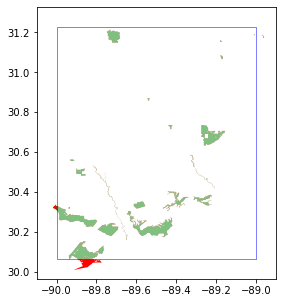

In [19]:
fig, ax = plt.subplots(figsize=[5,5])
ax.set_aspect('equal')

possible_matches.plot(ax=ax,color='r')
precise_matches.plot(ax=ax,color='g')
gpd.GeoDataFrame({'geometry':cell}).plot(ax=ax,color='w', edgecolor='b', alpha=0.5)

plt.xlim(cell.bounds[0]-0.1,cell.bounds[2]+0.1)
plt.ylim(cell.bounds[1]-0.1,cell.bounds[3]+0.1)

**Add percentage columns to table**

In [20]:
terrestrial_per.drop(columns=['geometry'], inplace= True)
marine_per.drop(columns=['geometry'], inplace= True)
per = pd.concat([terrestrial_per,marine_per])
df_new = pd.merge(df, per, how='left', on=['cell_id'])

NameError: name 'terrestrial_per' is not defined

**Save new table**

In [25]:
df_new.to_file(path+'global_facets_attr_pressures_vizz/global_facets_attr_pressures_vizz.shp')

**Add the columns of interest to a new table in carto**

```sql

WITH b as (SELECT cell_id, strict, conservati, biosphere, other, rank_sr, rank_rsr, rank_total, location, taxa, feature_da FROM global_facets_attr_pressures_vizz_old)

SELECT row_number() over() as cartodb_id, a.the_geom, a.the_geom_webmercator,
a.taxa, a.focal_spp, a.cell_id_nu, a.prop_land, a.isisland, a.agricultur, a.urban, a.rainfed, a.sr, a.ave_rsr, a.sum_rsr, a.ave_rsr_pc, a.sum_rsr_pc, a.sr_pc, a.cell_id,
b.strict, b.conservati, b.biosphere, b.other, b.rank_sr, b.rank_rsr, b.rank_total, b.location, b.feature_da FROM global_facets_20181004 as a
INNER JOIN b ON a.cell_id = b.cell_id AND a.taxa = b.taxa


```